In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('../..')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']

In [2]:
# trk and jet pt bins
trk_pt_lo = [1, 2, 4, 7]
trk_pt_hi = [2, 4, 7, 20]

jet_pt_lo = [40, 50, 60]
jet_pt_hi = [50, 60, 70]
jet_pt_sel = 2


In [5]:
# file defs

#base_dir = "/global/cfs/cdirs/alice/kdevero/"
#fs = [base_dir+"PbPb_jet-trk/20716692/merged.root"]
base_dir = "./output_mc/"
fs = [base_dir+"AnalysisResults.root"]
f_names = ["Pb+Pb, emb"]

n_jetpt = "h_jet_pt_JetPt_R0.4_0.15"
n_shape_pt = "h_jet-trk_shape_RL_TrkPt_JetPt_R0.4_0.15"
n_shape_z = "h_jet-trk_shape_RL_z_JetPt_R0.4_0.15"
n_ptprofile_pt = "h_jet-trk_ptprofile_RL_TrkPt_JetPt_R0.4_0.15"
n_ptprofile_z = "h_jet-trk_ptprofile_RL_z_JetPt_R0.4_0.15"

suffixes = ["Det", "DetEmb", "Truth", "UE"]


In [6]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    for jetpti in range(len(jet_pt_lo)):
        
        h = f[n_jetpt]
        h_jetpt = h.to_numpy()[0]
        pt_range = (findbin(h.axis("x"), jet_pt_lo[jetpti]), findbin(h.axis("x"), jet_pt_hi[jetpti]))
        h_jetpt = h_jetpt[pt_range[0]:pt_range[1]]
        N_jets = np.sum(h_jetpt)
        print("Njets : " + str(N_jets))

        h = f[n_shape_pt]
        bin_edges = h.axis("y").edges()
        bin_width = bin_edges[1] - bin_edges[0]
        
        h_numpy = h.to_numpy()[0]
        pt_range = (findbin(h.axis("z"), jet_pt_lo[jetpti]), findbin(h.axis("z"), jet_pt_hi[jetpti]))
        h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
        this_slice = projectionY(h_numpy)
        this_slice = this_slice / (bin_width * N_jets)
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, linestyle=L_linestyles[fi], color=L_colors[2*jetpti], label=f_names[fi] + ", " + str(jet_pt_lo[jetpti]) + " < jet pT < " + str(jet_pt_hi[jetpti]))
    

plt.legend()
plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 15)
#plt.ylim(1, 10)
#plt.xscale('log')
plt.yscale('log')
plt.show()



KeyInFileError: not found: 'h_jet_pt_JetPt_R0.4_0.15' (with any cycle number)

    Available keys: 'h_jet_pt_JetPt_R0.4_0.15_UE;1', 'h_jet_pt_JetPt_R0.4_0.15_Det;1', 'h_jet_pt_JetPt_R0.4_0.15_Truth;1', 'h_jet_pt_JetPt_R0.4_0.15_DetEmb;1', 'h_trk_pt_TrkPt_R0.4_0.15_UE;1', 'h_trk_pt_TrkPt_R0.4_0.15_Det;1'...

in file ./output_mc/AnalysisResults.root

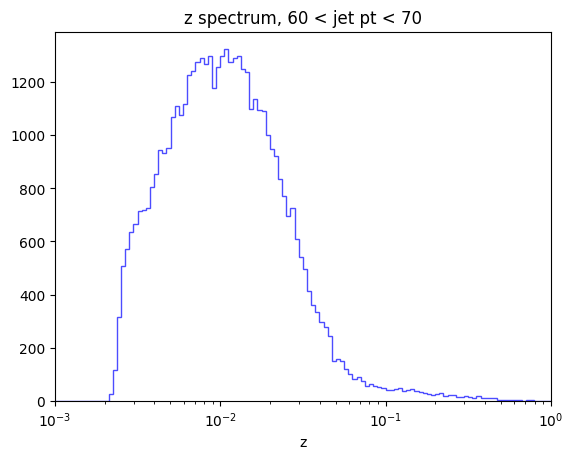

In [9]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("y").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
    this_slice = projectionY(h_numpy)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color="blue")
    
    plt.title("z spectrum, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel]) )
    plt.xlabel('z')
    plt.xlim(1e-3, 1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    

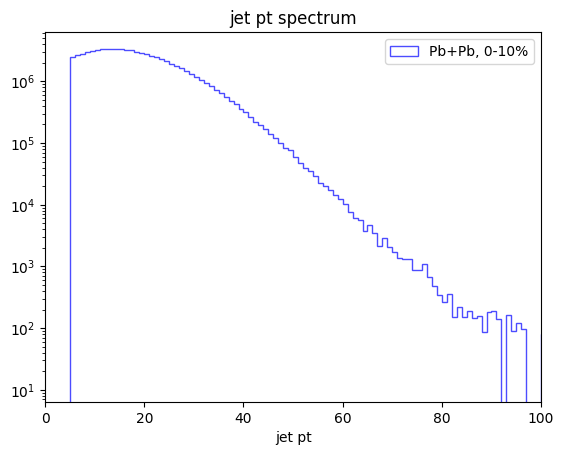

In [10]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("z").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionZ(h_numpy)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color="blue", linestyle=L_linestyles[fi], label=f_names[fi])
    
    plt.legend()
    plt.title("jet pt spectrum") 
    plt.xlabel('jet pt')
    plt.xlim(0, 100)
    #plt.xscale('log')
    plt.yscale('log')
plt.show()
    

In [11]:
# find number of jets in selected jet pt bin

N_jets = []

for f in fs:
    f = ur.open(f)
    h = f[n_jetpt]
    h_jetpt = h.to_numpy()[0]
    pt_range = (findbin(h.axis("x"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("x"), jet_pt_hi[jet_pt_sel]))
    h_jetpt = h_jetpt[pt_range[0]:pt_range[1]]
    N_jets.append(np.sum(h_jetpt))

print("Njets : " + str(N_jets))


Njets : [830.0]


(10, 20)
10461.0
(20, 40)
3122.0
(40, 70)
593.0
(70, 200)
565.0


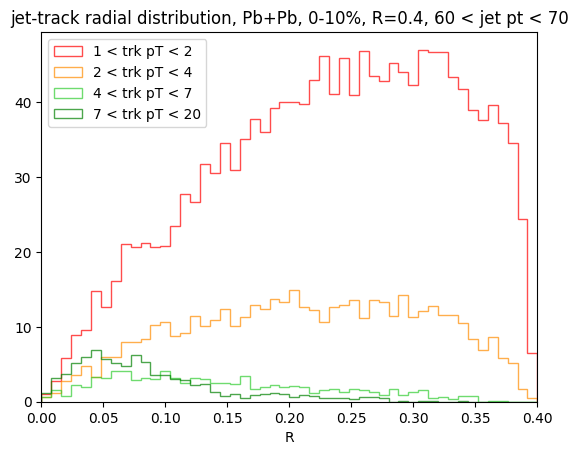

In [12]:
hs = []

for fi in range(len(fs)):
    f = ur.open(fs[fi])
    h = f[n_shape_pt]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
    
    integrals = []
    h_trk = []
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)

        this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
        print(np.sum(this_slice))
        this_slice = this_slice / (N_jets[fi] * bin_width)

        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, linestyle=L_linestyles[fi], color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
        h_trk.append(this_slice)
    hs.append(h_trk)

    plt.legend(loc='upper left')
    plt.title("jet-track radial distribution, " + f_names[fi] + ", R=0.4, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel])) 
    plt.xlabel('R')
    plt.xlim(0, 0.4)
    #plt.ylim(0, 0.5)

plt.show()

[    0.           159.2010903    568.81405861  1030.03376731
  1743.02943114  2555.66124474  3540.86471598  4471.78479478
  5397.49174179  6427.92064058  7512.7398124   8557.54422658
  9499.94621712 10515.26884475 11485.6714537  12477.97541812
 13453.44334434 14481.3587518  15450.06910246 16451.36211941
 17378.50252166 18397.80293619 19456.10070278 20494.816576
 21660.23492687 22803.55676248 23932.55377852 25052.23159718
 26186.65939152 27301.28446283 28407.37050534 29608.1470363
 30753.2320167  31926.80538761 33126.73330255 34267.26694729
 35414.30636079 36585.45058496 37704.31376768 38899.89137149
 40029.39232529 41150.0962437  42216.64339469 43259.08198733
 44257.52651388 45229.91322624 46216.99779704 47118.58663888
 47938.4968407 ]


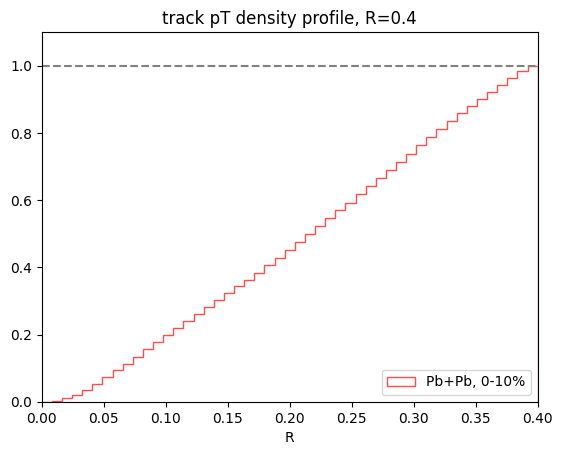

In [13]:
hs = []
for i in range(len(fs)):
    f = ur.open(fs[i])
    h = f[n_ptprofile_pt]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = projectionX(zslice(h_numpy, pt_range[0], pt_range[1]))

    n_r_bins = 50
    bin_edges = np.linspace(0, 0.4, n_r_bins)
    bin_widths = 0.4 / n_r_bins
    
    h_to_graph = np.array([np.sum(h_numpy[0:findbin(h.axis("x"), bin_edges[i])]) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    hs.append(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i])
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()


(10, 20)
(10, 40)
(10, 70)
(10, 200)


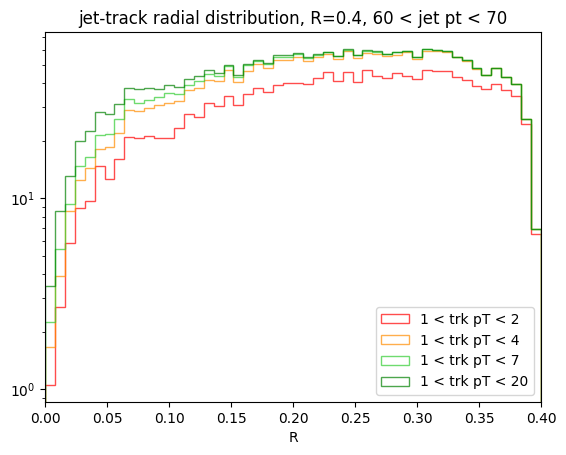

In [14]:
f = ur.open(fs[0])
h = f[n_shape_pt]
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

h_numpy = h.to_numpy()[0]
pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])

for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[0]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
    this_slice = this_slice / (N_jets[fi] * bin_width)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[0], trk_pt_hi[i]))
    
plt.legend(loc='lower right')
plt.title("jet-track radial distribution, R=0.4, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel])) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e2, 2e5)
plt.show()

(10, 20)
(10, 40)
(10, 70)
(10, 200)


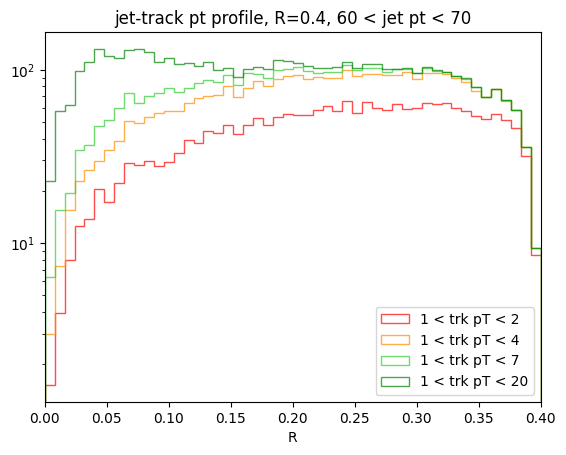

In [15]:
f = ur.open(fs[0])
h = f[n_ptprofile_pt]
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

h_numpy = h.to_numpy()[0]
pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])

for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[0]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
    this_slice = this_slice / (N_jets[fi] * bin_width)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[0], trk_pt_hi[i]))
    
plt.legend(loc='lower right')
plt.title("jet-track pt profile, R=0.4, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel])) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e2, 2e5)
plt.show()
